# GUC Clustering Project 

**Wesam Ayman Ahmed 46-5313**

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [107]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [119]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [120]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



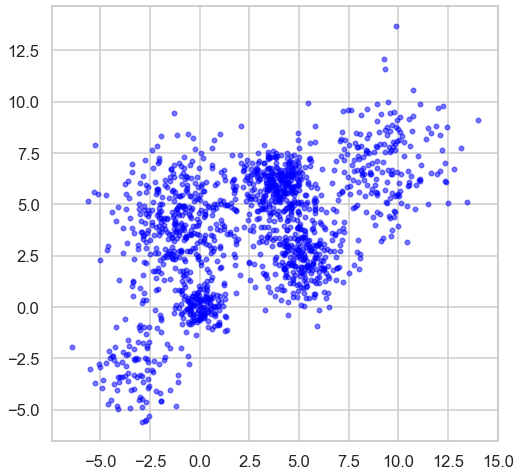

In [121]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [75]:
def Kmeans(Data):
    distortions = []
    silhouette_scores = []
    K = range(2, 8)

    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(Data)
        distortions.append(kmeans.inertia_)
        score = silhouette_score(Data, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"K = {k}, silhouette_score = {score}")
        display_cluster(Data, kmeans, k)
        plt.title("K = {}".format(k))
        plt.show()
    fig, f = plt.subplots(1,2, figsize=(16,6))
    f[0].plot(K, distortions, 'bx-')
    f[0].set_xlabel('K')
    f[0].set_ylabel('Distortion')
    f[0].set_title('Distortion Function versus K')

    f[1].plot(K, silhouette_scores, 'bx-')
    f[1].set_xlabel('K')
    f[1].set_ylabel('Silhouette Score')
    f[1].set_title('Silhouette Scores for best K')

    plt.show()    


K = 2, silhouette_score = 0.4751544541991239


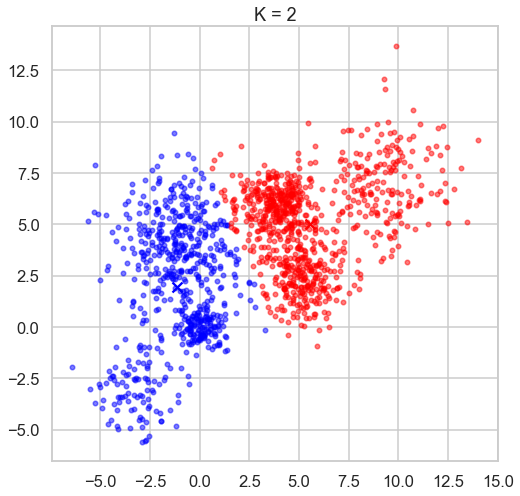

K = 3, silhouette_score = 0.43631793714185435


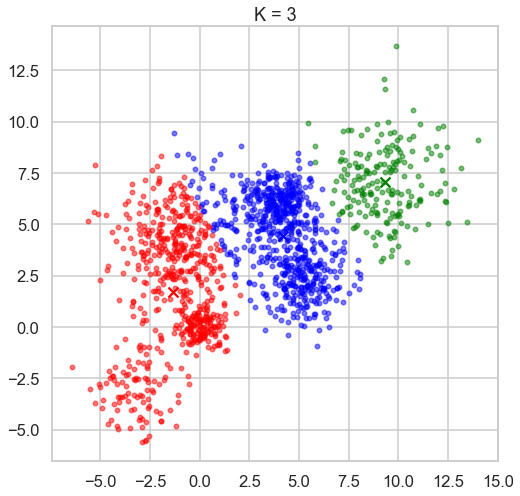

K = 4, silhouette_score = 0.4628725400351352


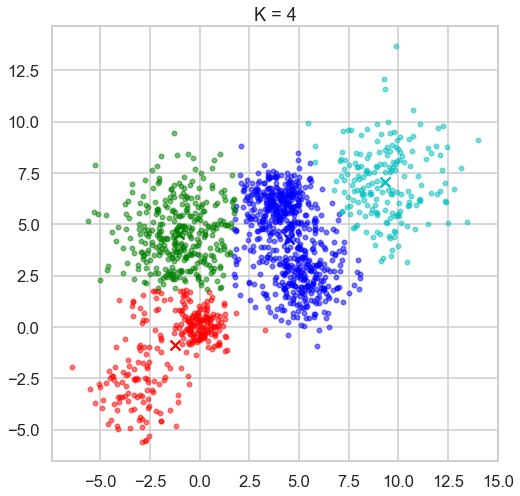

K = 5, silhouette_score = 0.48085813358066154


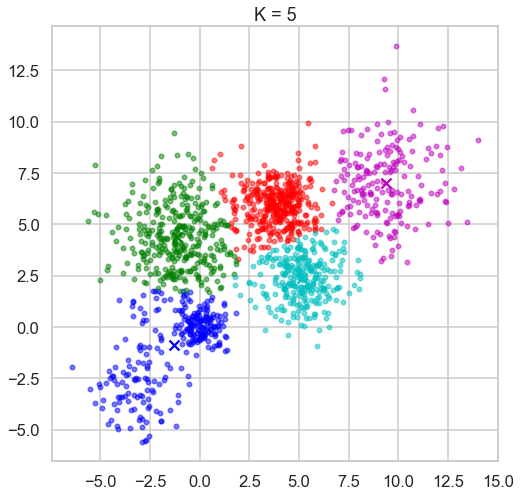

K = 6, silhouette_score = 0.48609408962389006


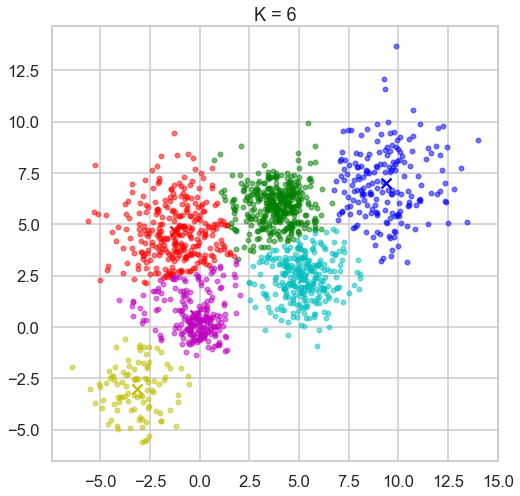

K = 7, silhouette_score = 0.46340972197949165


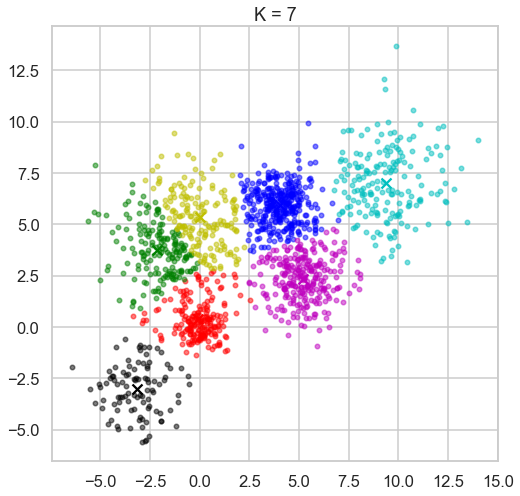

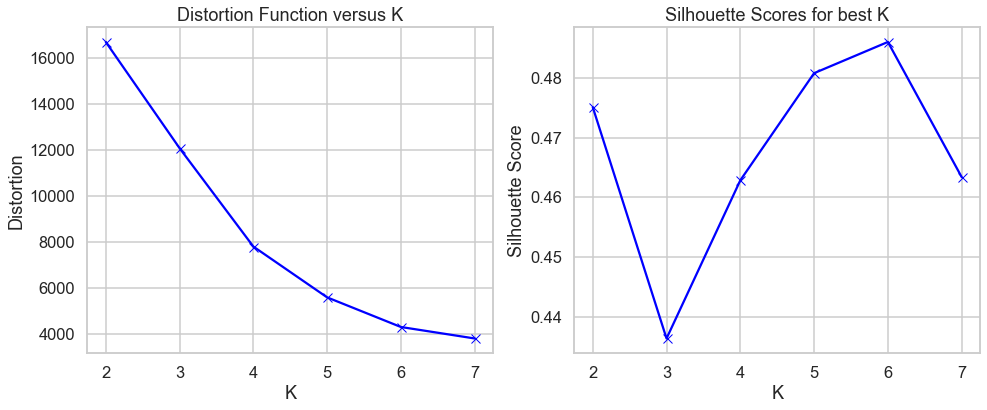

In [76]:
Kmeans(Multi_blob_Data)

*   From the distortion function versus K graph, we can see that the distortion decreases as K increases, but the rate of decrease slows down at K=6. So we can conclude that K=6 is the optimal value of K.
*   From the silhouette plot, we can see that the silhouette score is highest at K=6. This confirms our conclusion that K=6 is the optimal value of K.

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [77]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
def HierarchalClustering(Data):
    # Create a list of all parameter combinations to try
    affinities = ["euclidean", "cosine", "manhattan"]
    linkages = ["average", "single"]
    thresholds = np.arange(0.1, 1.1, 0.1)

    # Initialize variables to keep track of the best parameters and silhouette score
    best_params = {}
    best_silhouette_score = -1

    # Loop through all parameter combinations and calculate the silhouette score
    for affinity in affinities:
        for linkage_type in linkages:
            for threshold in thresholds:
                # Fit the model and get the labels
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=threshold)
                labels = model.fit_predict(Data)
            
                # Calculate the silhouette score
                silhouette = silhouette_score(Data, labels)
            
                # Plot the dendrogram
                plt.title(f"Dendrogram ({affinity}, {linkage_type}, {threshold:.1f})")
                dendrogram(linkage(Data, method=linkage_type, metric=affinity), truncate_mode="level", p=3)
                plt.xlabel("Data points")
                plt.ylabel("Distance")
                plt.show()
            
                # Print the silhouette score and the resulting clusters
                print(f"Silhouette score ({affinity}, {linkage_type}, {threshold:.1f}): {silhouette:.3f}")
                print(f"Clusters ({affinity}, {linkage_type}, {threshold:.1f}): {np.unique(labels)}")
                print("=" * 50)
            
                # Update the best parameters and silhouette score if the current score is better
                if silhouette > best_silhouette_score:
                    best_silhouette_score = silhouette
                    best_params = {"affinity": affinity, "linkage": linkage_type, "distance_threshold": threshold}

    # Print the best parameters and silhouette score
    print(f"Best silhouette score: {best_silhouette_score:.3f}")
    print(f"Best parameters: {best_params}")


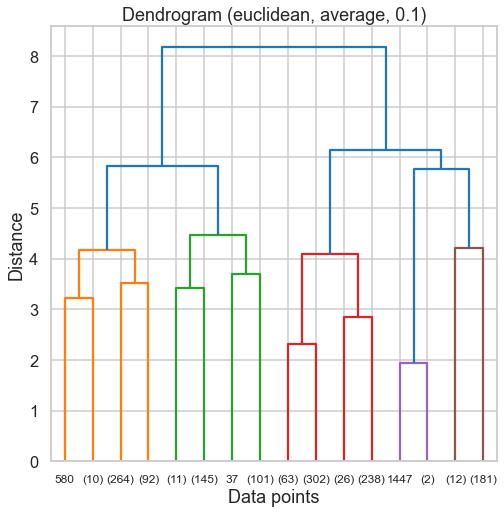

Silhouette score (euclidean, average, 0.1): 0.188
Clusters (euclidean, average, 0.1): [   0    1    2 ... 1158 1159 1160]


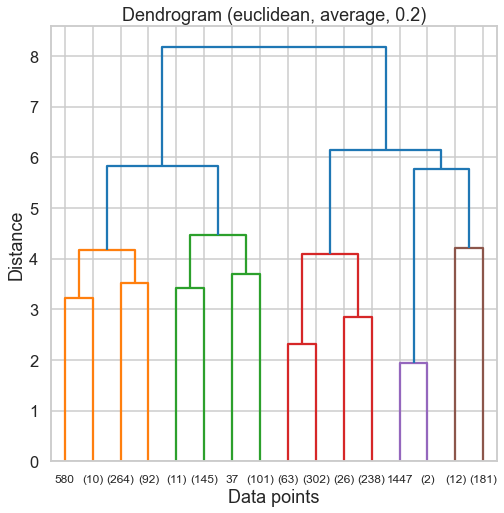

Silhouette score (euclidean, average, 0.2): 0.324
Clusters (euclidean, average, 0.2): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

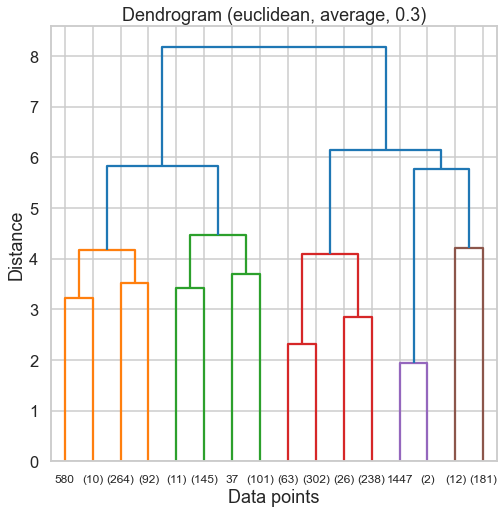

Silhouette score (euclidean, average, 0.3): 0.369
Clusters (euclidean, average, 0.3): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

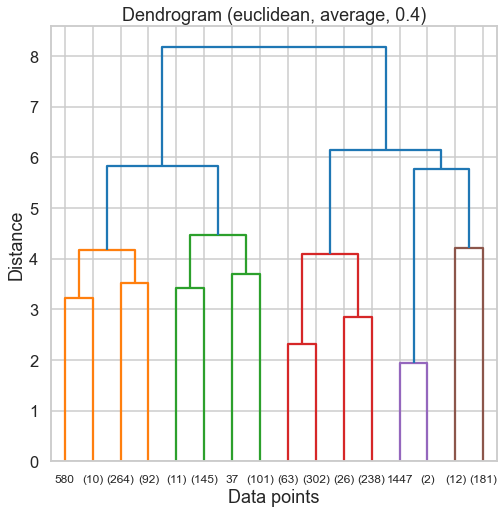

Silhouette score (euclidean, average, 0.4): 0.377
Clusters (euclidean, average, 0.4): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

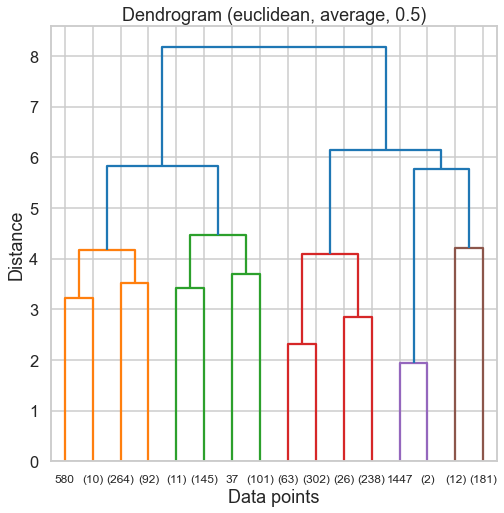

Silhouette score (euclidean, average, 0.5): 0.374
Clusters (euclidean, average, 0.5): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

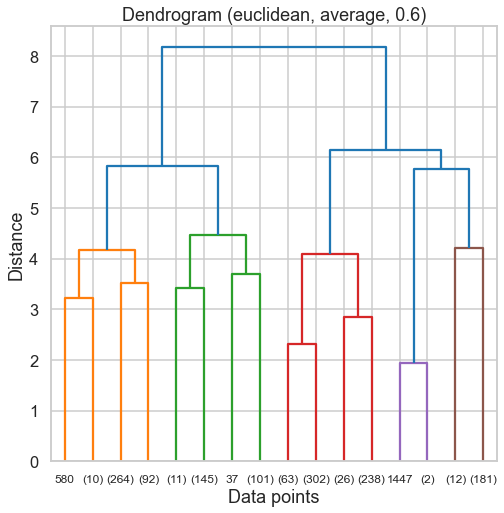

Silhouette score (euclidean, average, 0.6): 0.356
Clusters (euclidean, average, 0.6): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

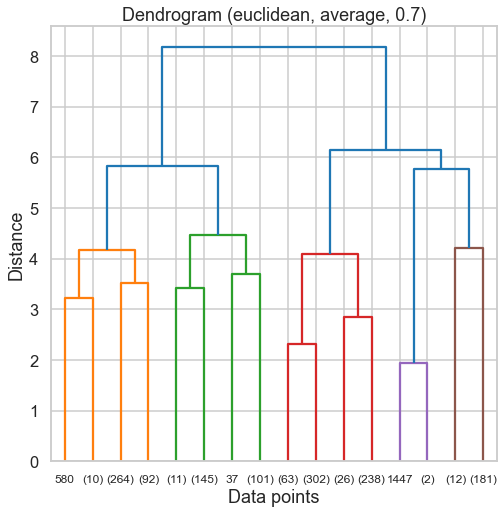

Silhouette score (euclidean, average, 0.7): 0.353
Clusters (euclidean, average, 0.7): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]


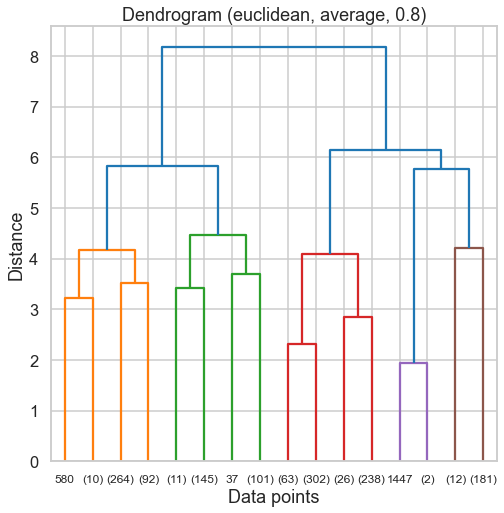

Silhouette score (euclidean, average, 0.8): 0.351
Clusters (euclidean, average, 0.8): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157]


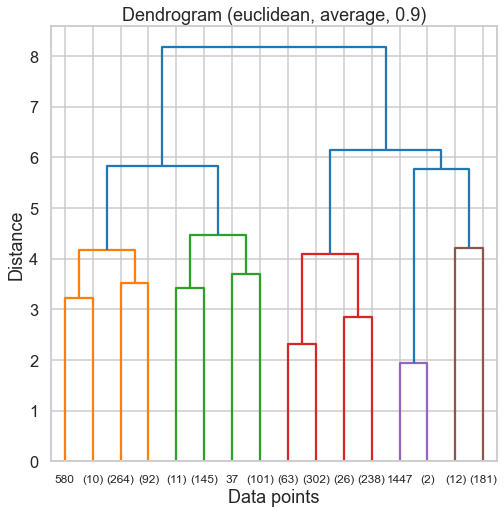

Silhouette score (euclidean, average, 0.9): 0.340
Clusters (euclidean, average, 0.9): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]


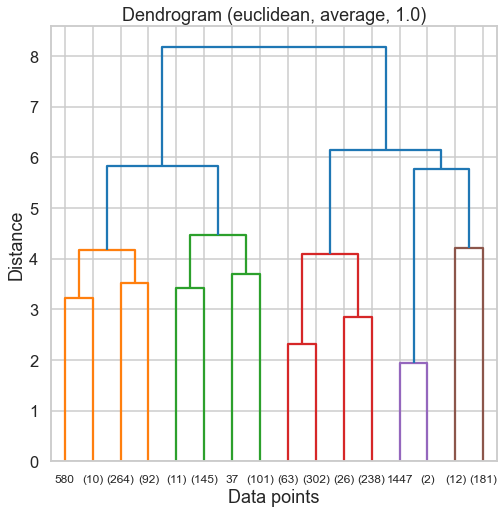

Silhouette score (euclidean, average, 1.0): 0.324
Clusters (euclidean, average, 1.0): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114]


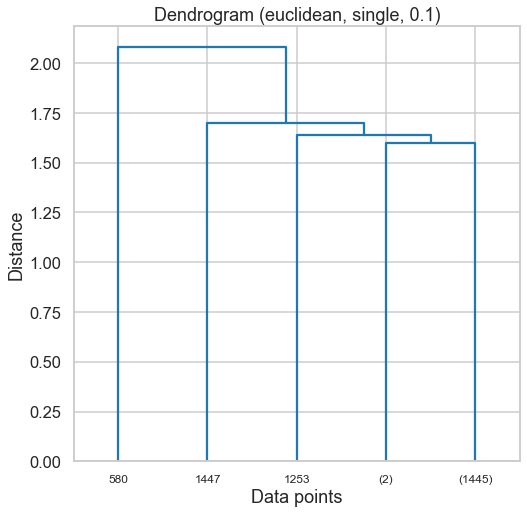

Silhouette score (euclidean, single, 0.1): 0.176
Clusters (euclidean, single, 0.1): [   0    1    2 ... 1091 1092 1093]


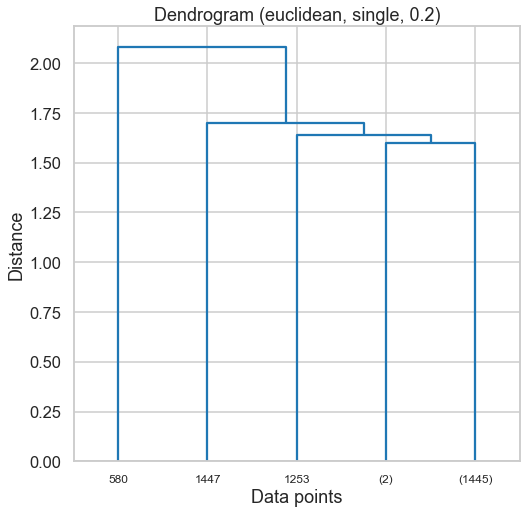

Silhouette score (euclidean, single, 0.2): 0.088
Clusters (euclidean, single, 0.2): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225

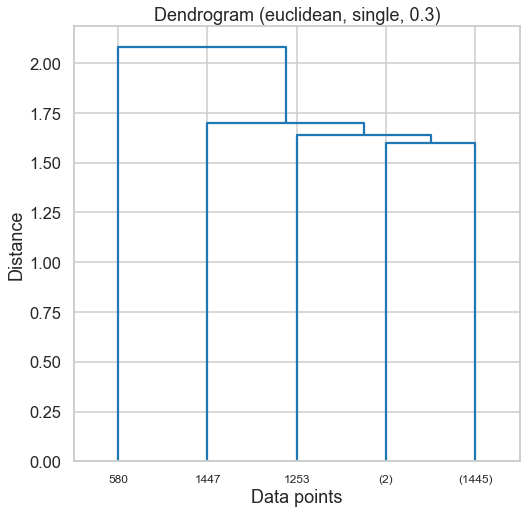

Silhouette score (euclidean, single, 0.3): -0.193
Clusters (euclidean, single, 0.3): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 22

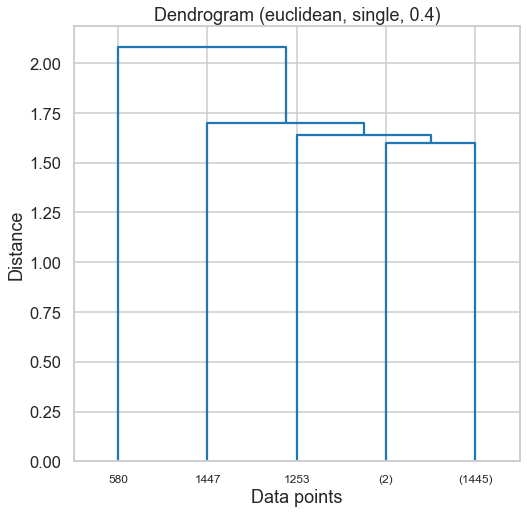

Silhouette score (euclidean, single, 0.4): -0.451
Clusters (euclidean, single, 0.4): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144]


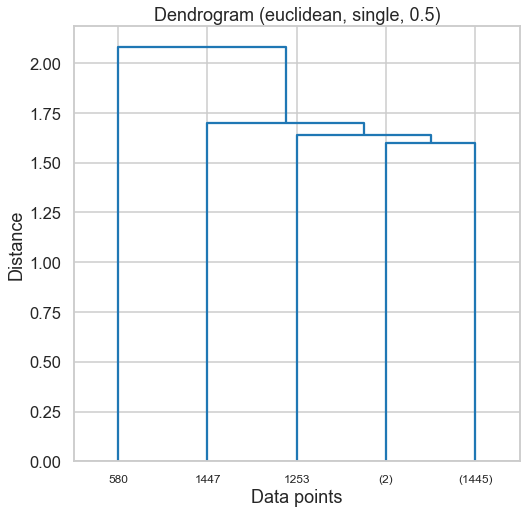

Silhouette score (euclidean, single, 0.5): -0.460
Clusters (euclidean, single, 0.5): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


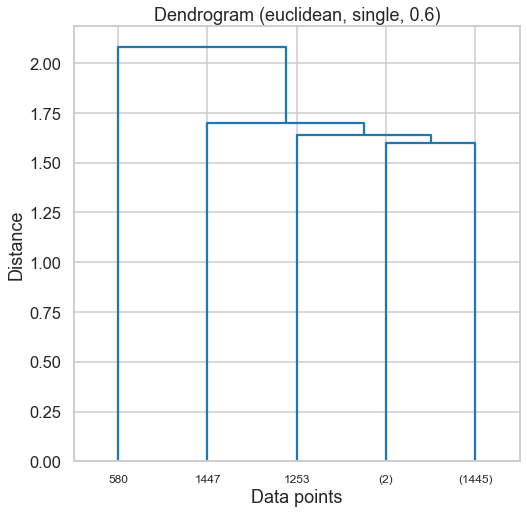

Silhouette score (euclidean, single, 0.6): -0.424
Clusters (euclidean, single, 0.6): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


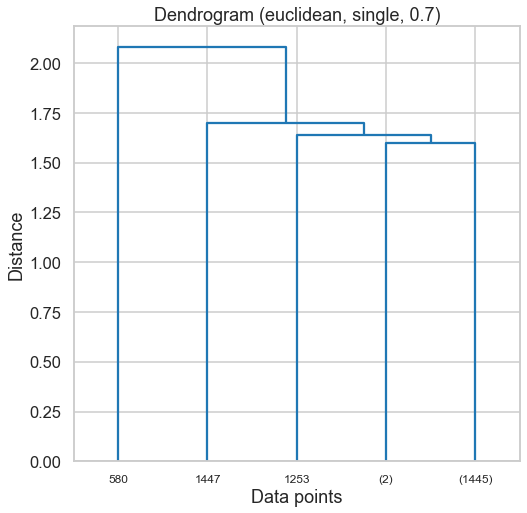

Silhouette score (euclidean, single, 0.7): -0.441
Clusters (euclidean, single, 0.7): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


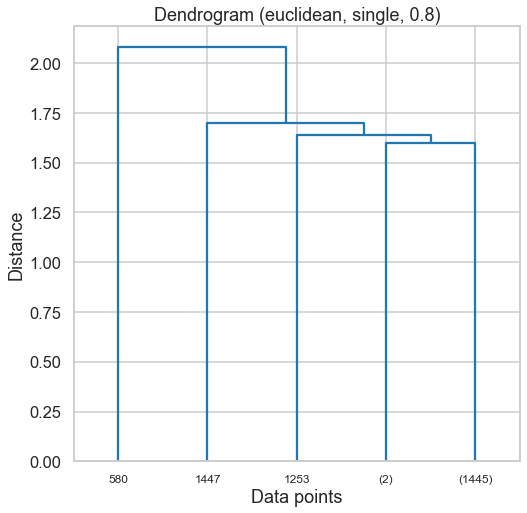

Silhouette score (euclidean, single, 0.8): -0.413
Clusters (euclidean, single, 0.8): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


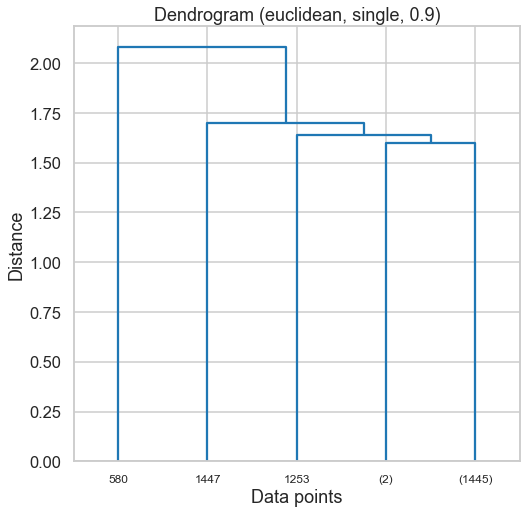

Silhouette score (euclidean, single, 0.9): -0.169
Clusters (euclidean, single, 0.9): [ 0  1  2  3  4  5  6  7  8  9 10 11]


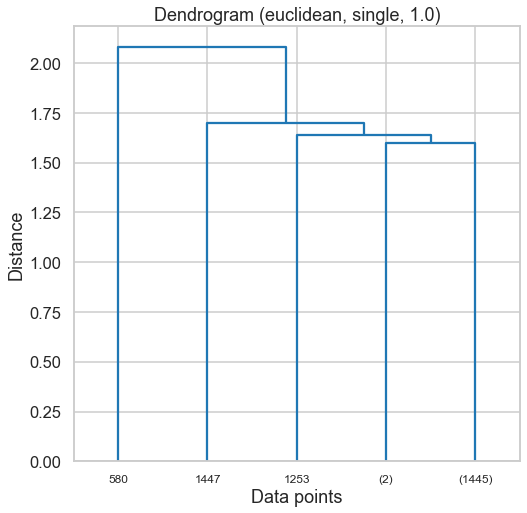

Silhouette score (euclidean, single, 1.0): -0.149
Clusters (euclidean, single, 1.0): [0 1 2 3 4 5 6 7 8]


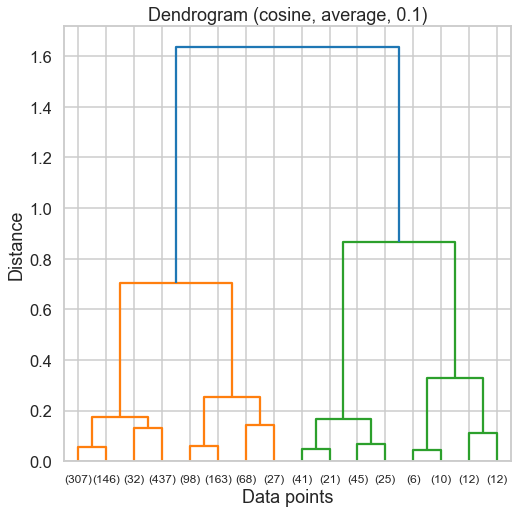

Silhouette score (cosine, average, 0.1): 0.125
Clusters (cosine, average, 0.1): [ 0  1  2  3  4  5  6  7  8  9 10]


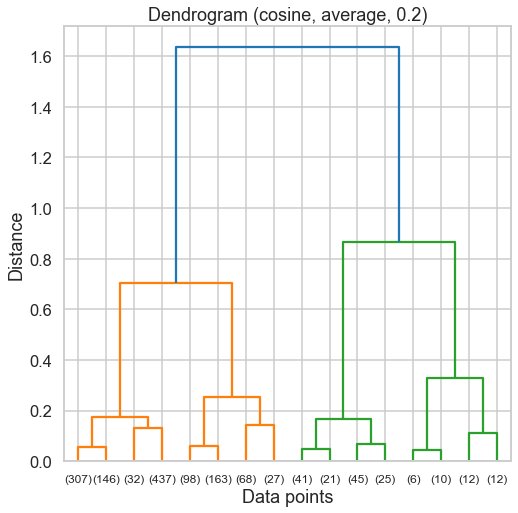

Silhouette score (cosine, average, 0.2): 0.204
Clusters (cosine, average, 0.2): [0 1 2 3 4 5]


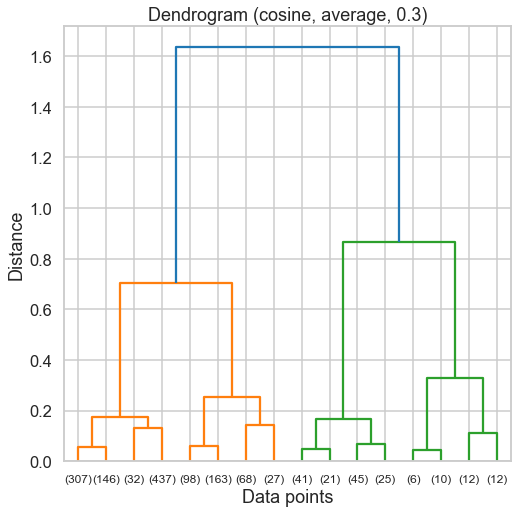

Silhouette score (cosine, average, 0.3): 0.249
Clusters (cosine, average, 0.3): [0 1 2 3 4]


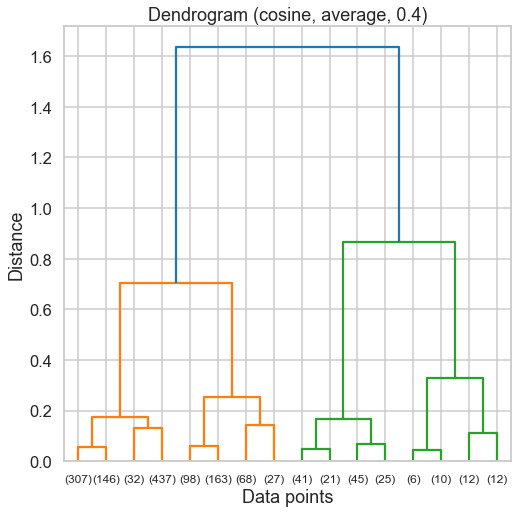

Silhouette score (cosine, average, 0.4): 0.280
Clusters (cosine, average, 0.4): [0 1 2 3]


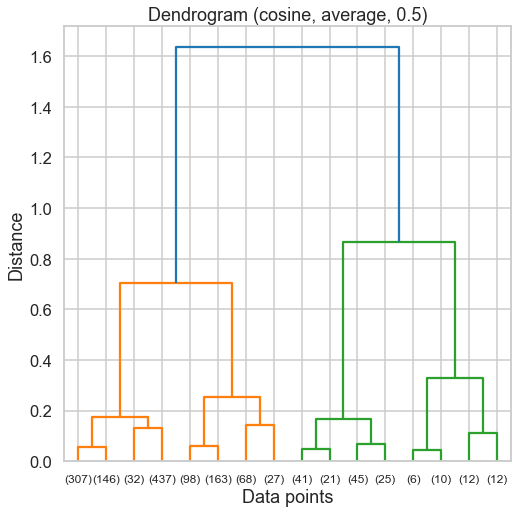

Silhouette score (cosine, average, 0.5): 0.280
Clusters (cosine, average, 0.5): [0 1 2 3]


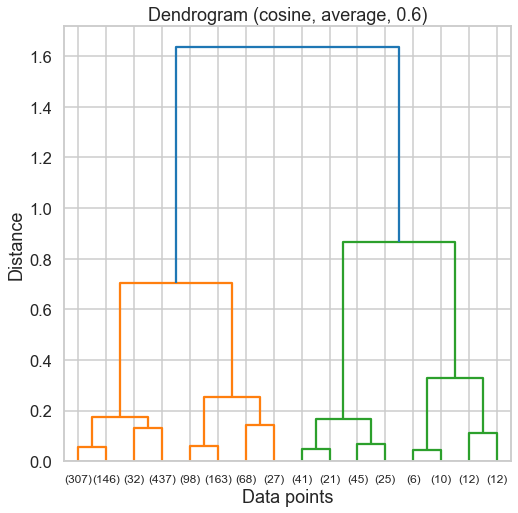

Silhouette score (cosine, average, 0.6): 0.280
Clusters (cosine, average, 0.6): [0 1 2 3]


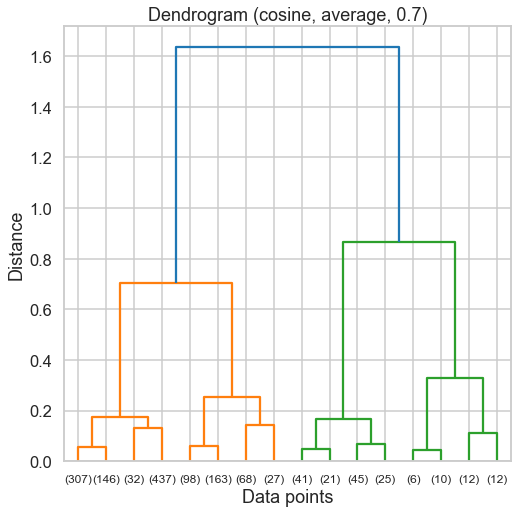

Silhouette score (cosine, average, 0.7): 0.280
Clusters (cosine, average, 0.7): [0 1 2 3]


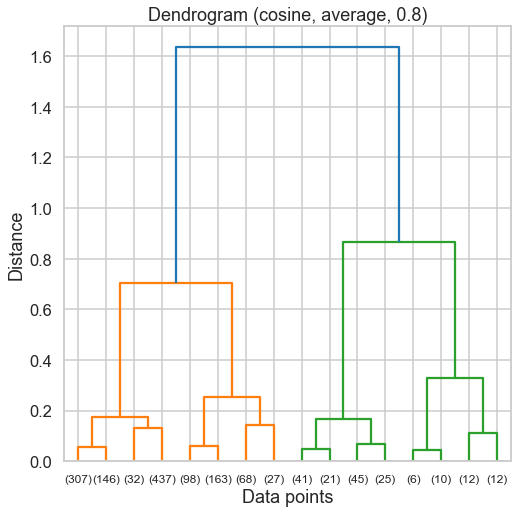

Silhouette score (cosine, average, 0.8): 0.135
Clusters (cosine, average, 0.8): [0 1 2]


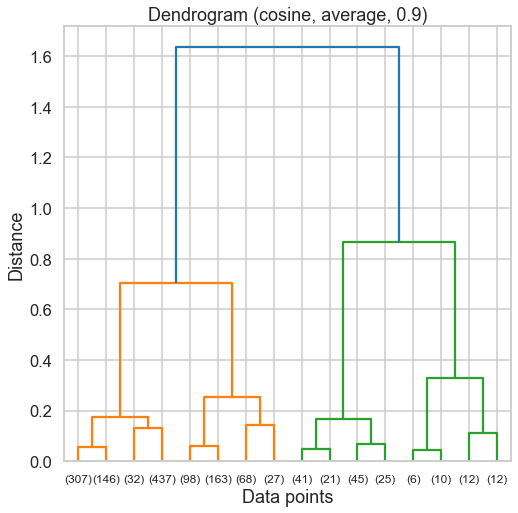

Silhouette score (cosine, average, 0.9): 0.353
Clusters (cosine, average, 0.9): [0 1]


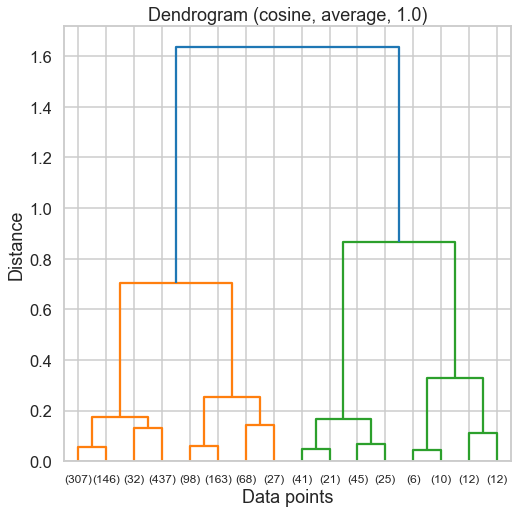

Silhouette score (cosine, average, 1.0): 0.353
Clusters (cosine, average, 1.0): [0 1]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [78]:
HierarchalClustering(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [96]:
def DBScan(Data):
    eps_values = np.arange(0.1, 3.1, 0.1)
    min_samples_values = np.arange(5, 26)

    best_score = -1
    best_params = None
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(Data)
            if len(np.unique(dbscan_labels)) > 1:
                score = silhouette_score(Data, dbscan_labels)
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
            plt.scatter(Data[:,0], Data[:,1], c=dbscan_labels)
            plt.title(f"eps={eps}, min_samples={min_samples}")
    plt.show()

    print("Best Silhouette Score:", best_score)
    print("Best Parameters (eps, min_samples):", best_params)

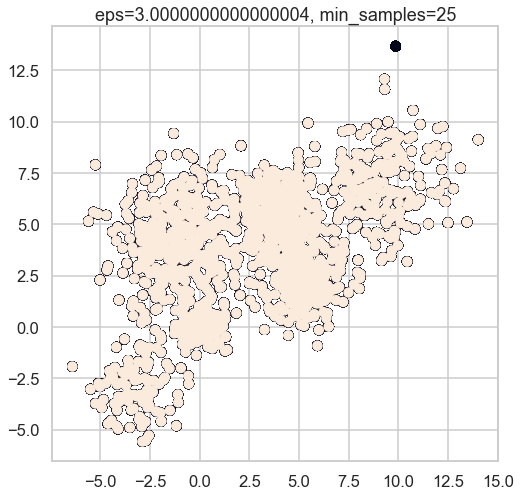

Best Silhouette Score: 0.4685207355522043
Best Parameters (eps, min_samples): (2.1, 6)


In [97]:
DBScan(Multi_blob_Data)

*  The set of paramters that result in the best silhouette_score (eps,min_samples) = (2.1, 6)
*   Best silhouette_score = 0.4685207355522043

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [122]:
def GaussianMix(Data):
    # fit a Gaussian Mixture Model with six components
    n_clusters = 6
    covariance_types = ['spherical', 'tied', 'diag', 'full']
    for i, covariance_type in enumerate(covariance_types):
        gmm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, random_state=42)
        gmm.fit(Data)

        # predict the cluster labels
        gmm_labels = gmm.predict(Data)

        # plot the resulting clusters
        plt.scatter(Data[:, 0], Data[:, 1], c=gmm_labels, s=50, cmap='viridis')
        plt.show()

        # plot the data points
        plt.scatter(Data[:, 0], Data[:, 1], s=10, color='black', alpha=0.5)

        # plot the GMM components
        x = np.linspace(-10., 10.)
        y = np.linspace(-10., 10.)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -gmm.score_samples(XX)
        Z = Z.reshape(X.shape)
        plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')

        # plot the total GMM
        plt.contour(X, Y, np.exp(Z), levels=np.logspace(0, 3, 10), alpha=0.5, cmap='viridis')
        plt.show()


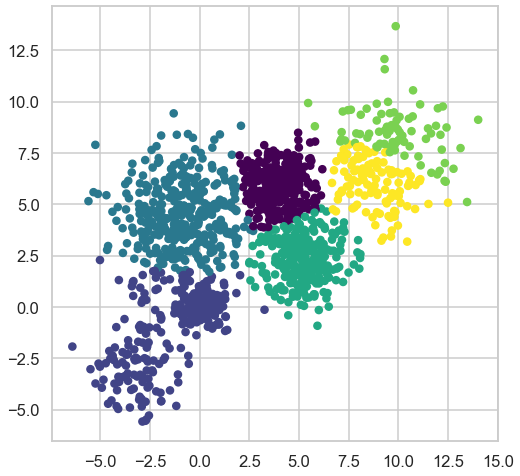

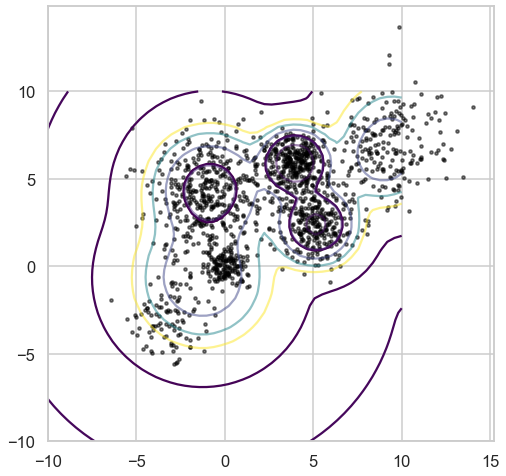

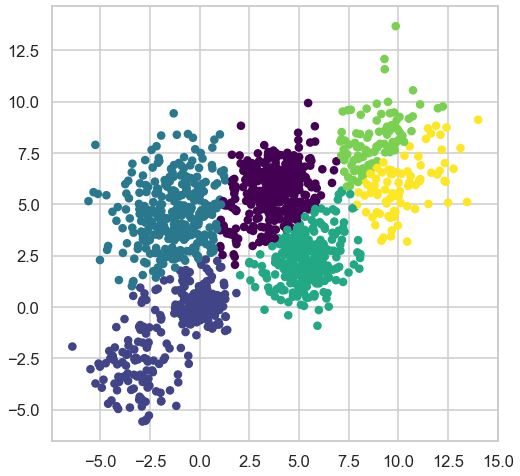

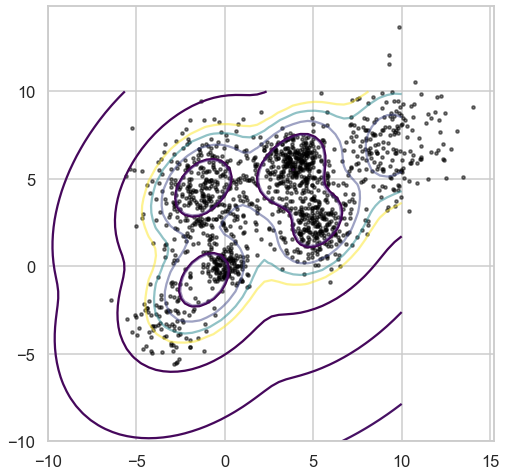

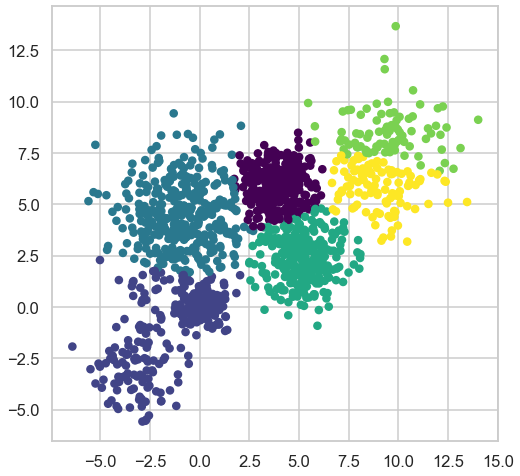

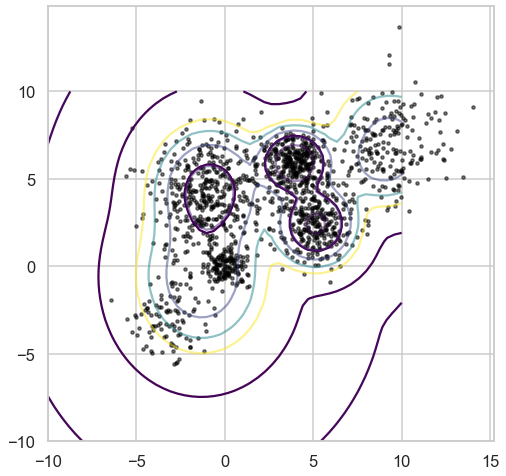

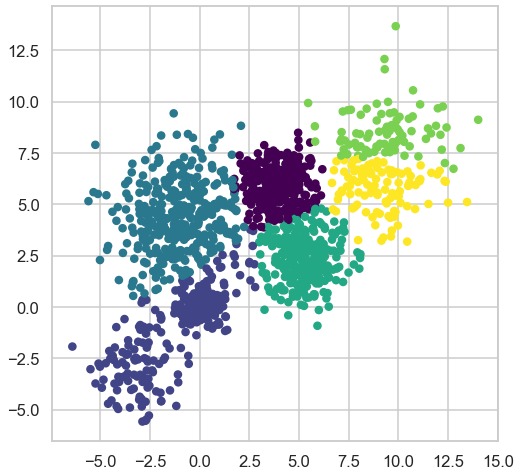

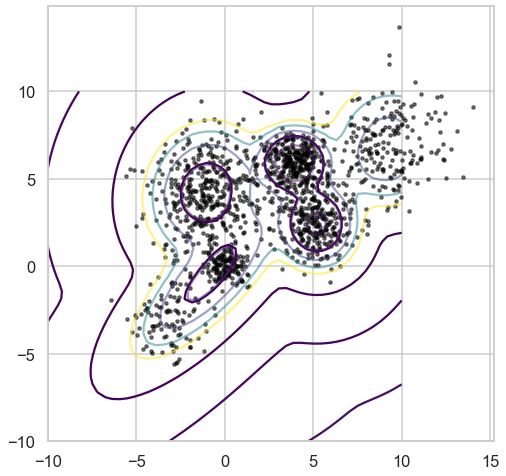

In [123]:
GaussianMix(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [129]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris_normalized = scaler.fit_transform(iris_data)

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

### Kmeans

K = 2, silhouette_score = 0.6300471284354711


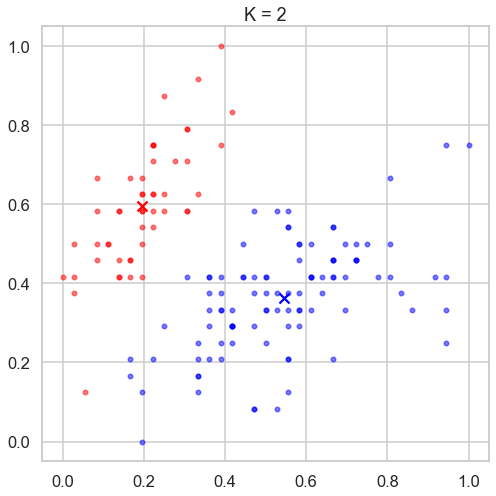

K = 3, silhouette_score = 0.5047687565398589


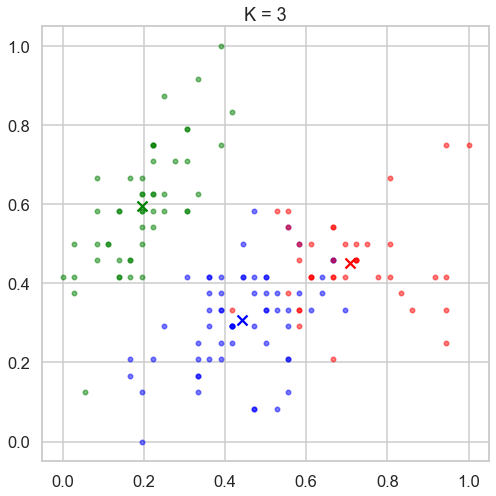

K = 4, silhouette_score = 0.44506548804598545


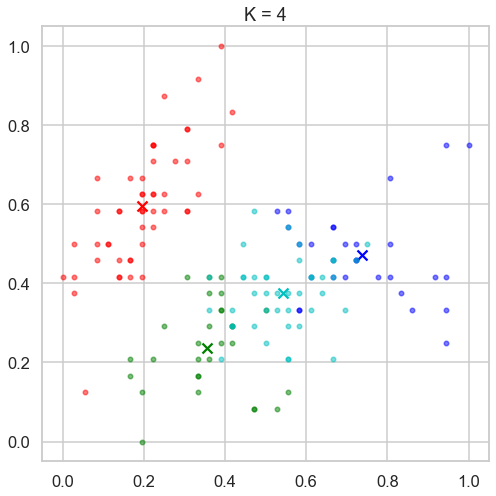

K = 5, silhouette_score = 0.35067748984646496


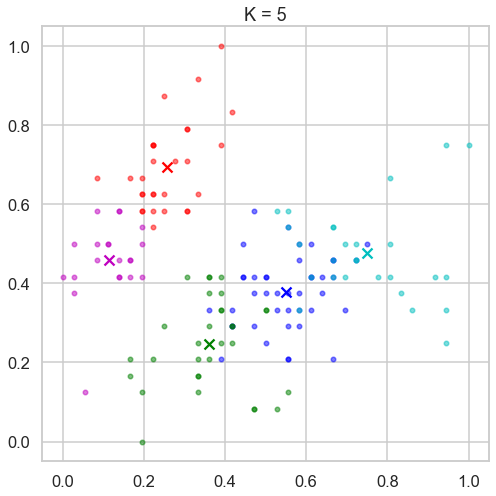

K = 6, silhouette_score = 0.3524618716009237


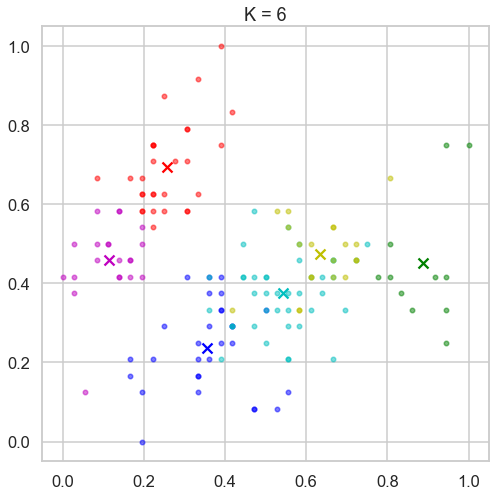

K = 7, silhouette_score = 0.3382806118866224


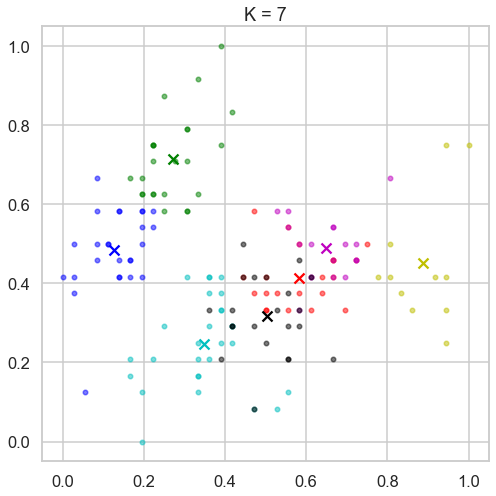

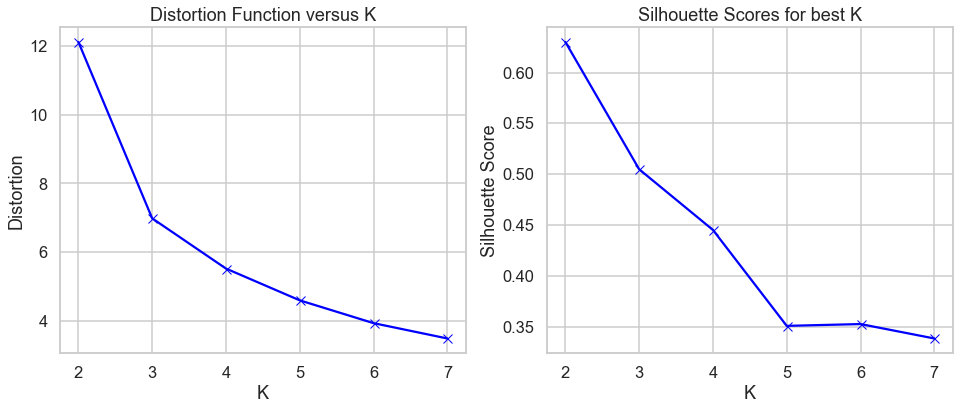

In [133]:
Kmeans(iris_normalized)

### Hierarchal Clustering

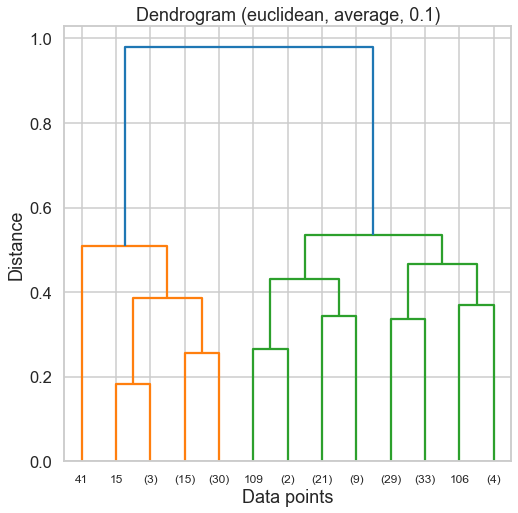

Silhouette score (euclidean, average, 0.1): 0.249
Clusters (euclidean, average, 0.1): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]


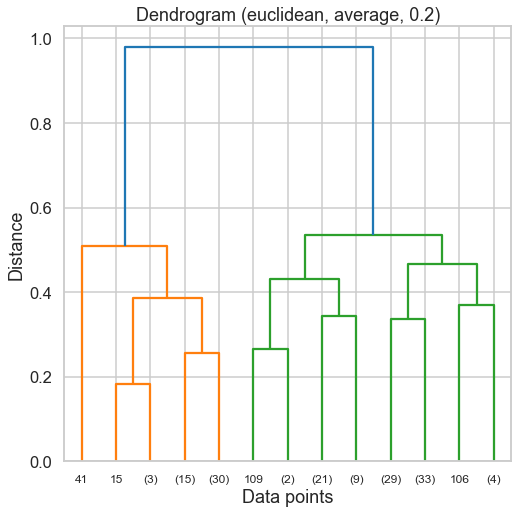

Silhouette score (euclidean, average, 0.2): 0.305
Clusters (euclidean, average, 0.2): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


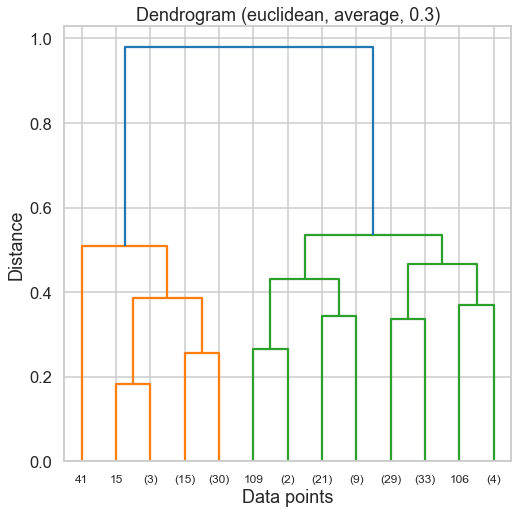

Silhouette score (euclidean, average, 0.3): 0.313
Clusters (euclidean, average, 0.3): [ 0  1  2  3  4  5  6  7  8  9 10]


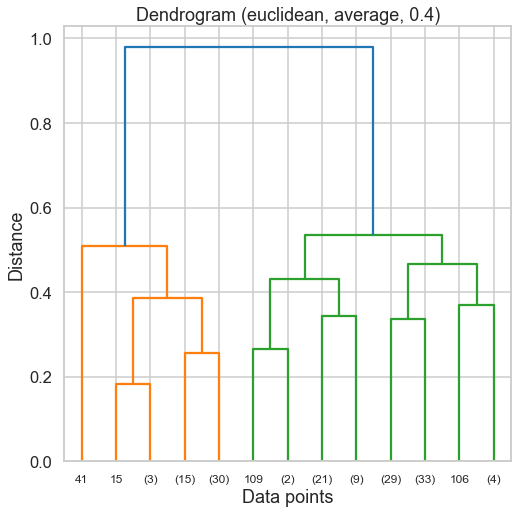

Silhouette score (euclidean, average, 0.4): 0.346
Clusters (euclidean, average, 0.4): [0 1 2 3 4 5]


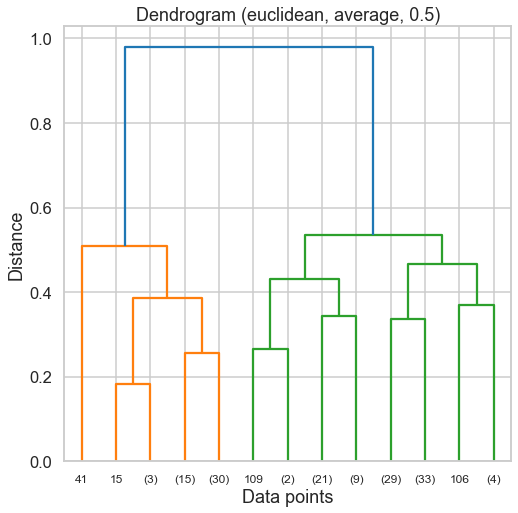

Silhouette score (euclidean, average, 0.5): 0.424
Clusters (euclidean, average, 0.5): [0 1 2 3]


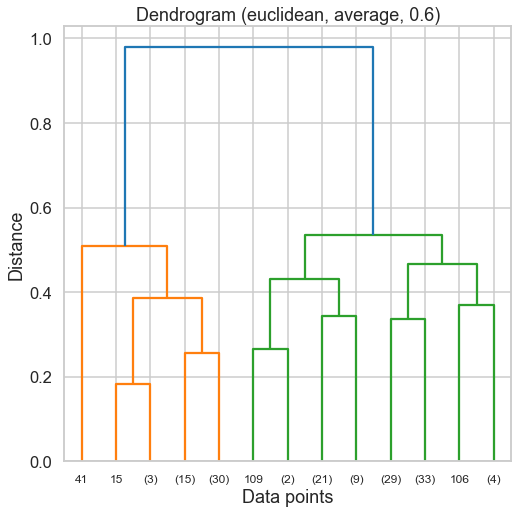

Silhouette score (euclidean, average, 0.6): 0.630
Clusters (euclidean, average, 0.6): [0 1]


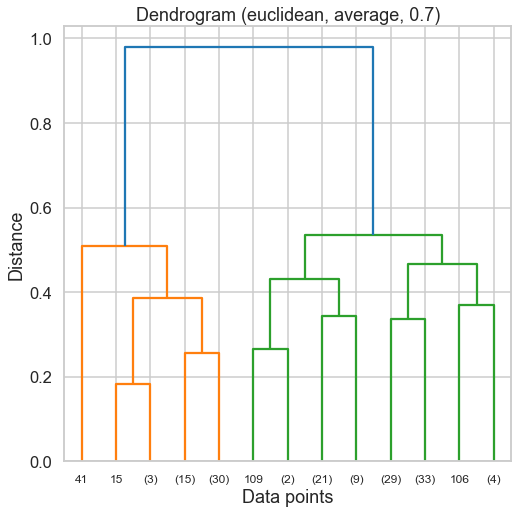

Silhouette score (euclidean, average, 0.7): 0.630
Clusters (euclidean, average, 0.7): [0 1]


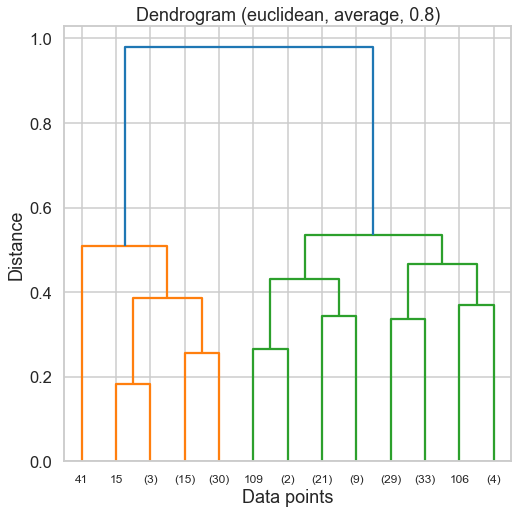

Silhouette score (euclidean, average, 0.8): 0.630
Clusters (euclidean, average, 0.8): [0 1]


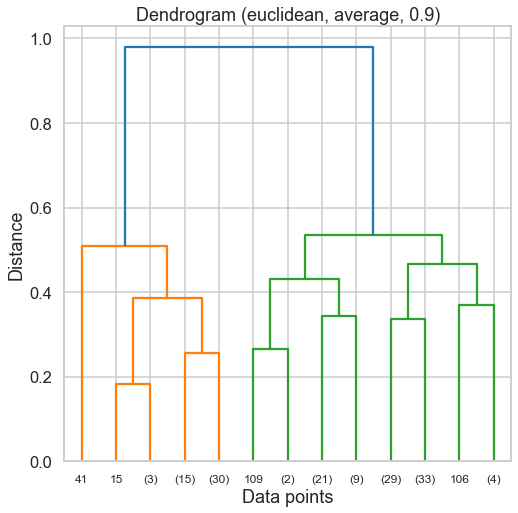

Silhouette score (euclidean, average, 0.9): 0.630
Clusters (euclidean, average, 0.9): [0 1]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [134]:
HierarchalClustering(iris_normalized)

### DBScan

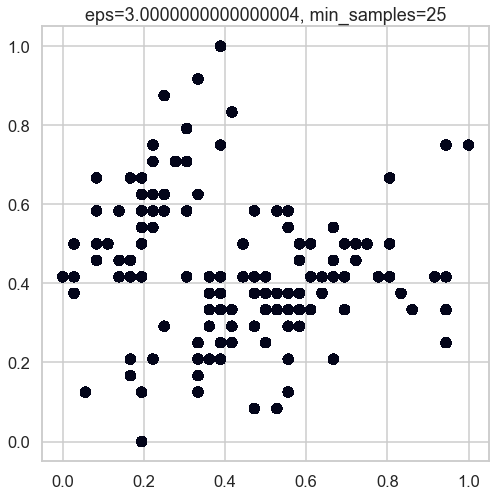

Best Silhouette Score: 0.6300471284354711
Best Parameters (eps, min_samples): (0.4, 5)


In [135]:
DBScan(iris_normalized)

### Gaussian Mixture

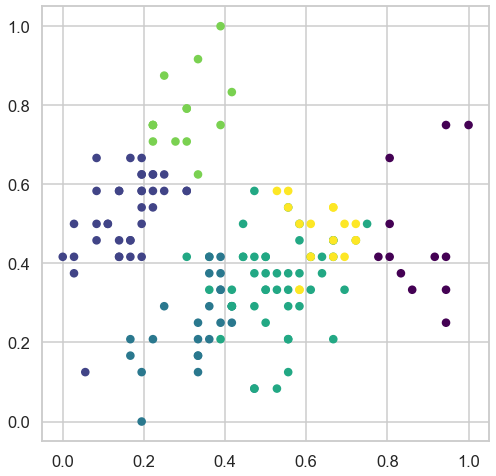

ValueError: X has 2 features, but GaussianMixture is expecting 4 features as input.

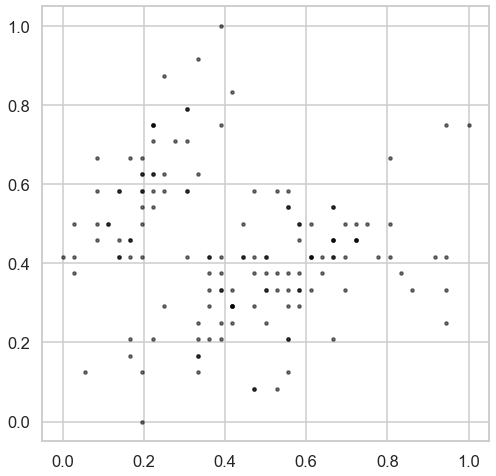

In [136]:
GaussianMix(iris_normalized)

## Customer dataset
Repeat all the above on the customer data set 

In [144]:
Customer_dataset = pd.read_csv(r"C:\Users\wessam\Desktop\Customer data.csv")
Customer_data=Customer_dataset[['Age','Income']]
scaler = MinMaxScaler()
Customer_normalized = scaler.fit_transform(Customer_data)

### Kmeans

K = 2, silhouette_score = 0.4962868155023311


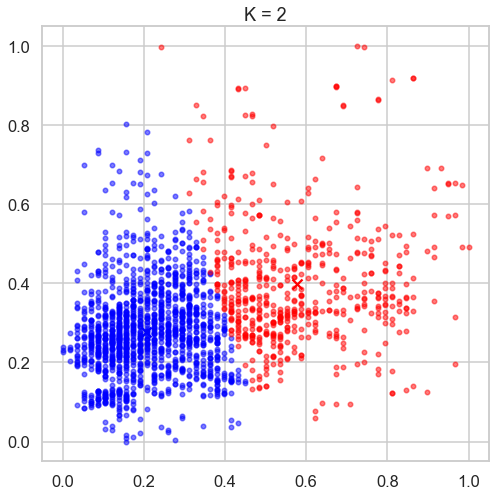

K = 3, silhouette_score = 0.3625651188250019


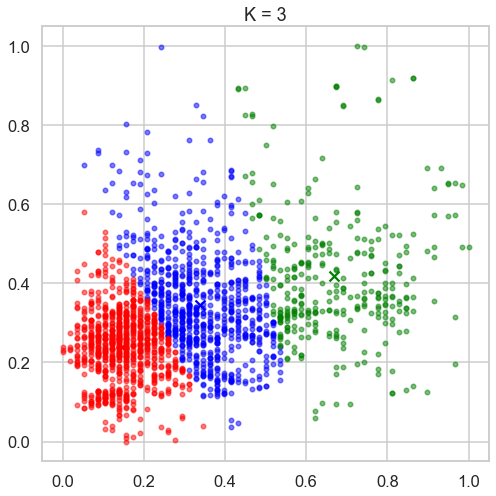

K = 4, silhouette_score = 0.40229012381236284


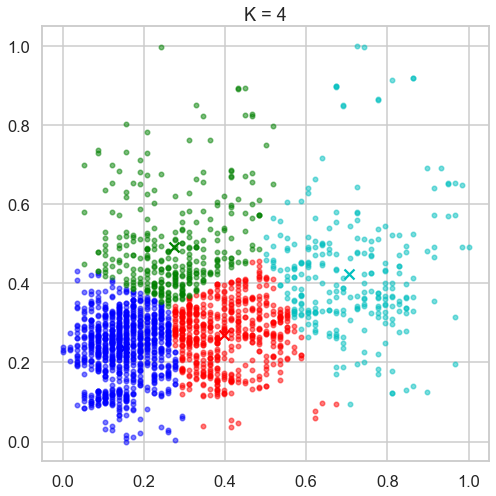

K = 5, silhouette_score = 0.36402164457586195


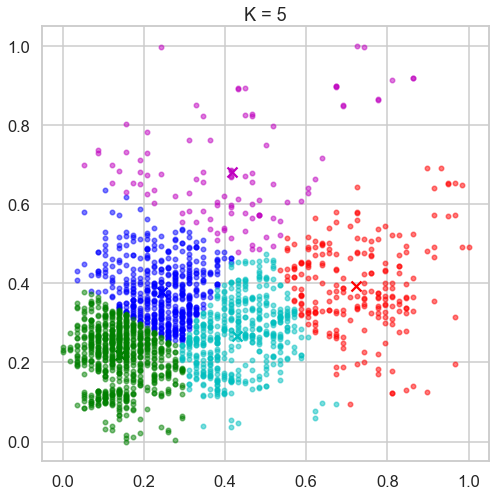

K = 6, silhouette_score = 0.3752824067532385


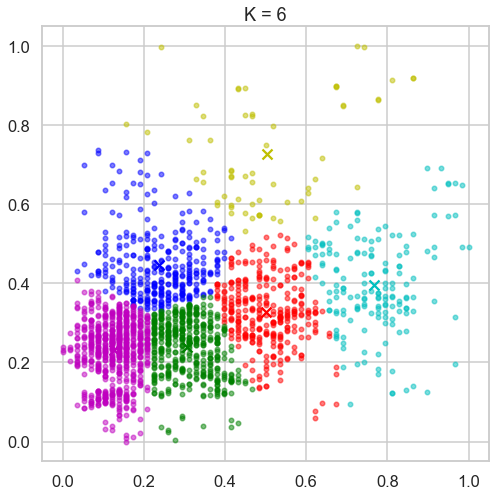

K = 7, silhouette_score = 0.3551685237791867


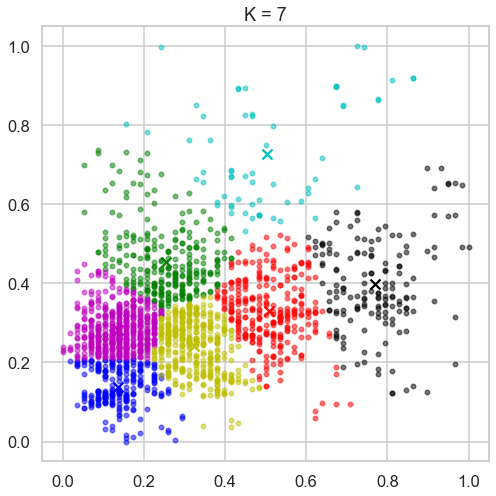

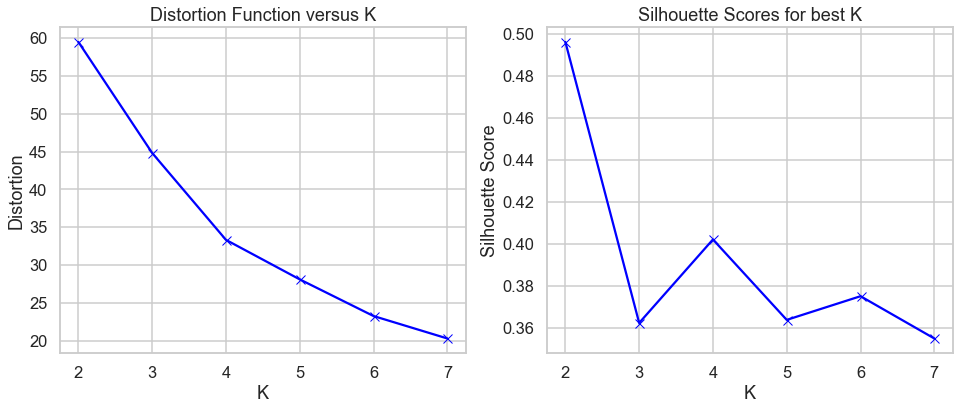

In [145]:
Kmeans(Customer_normalized)

### Hierarchal Clustering

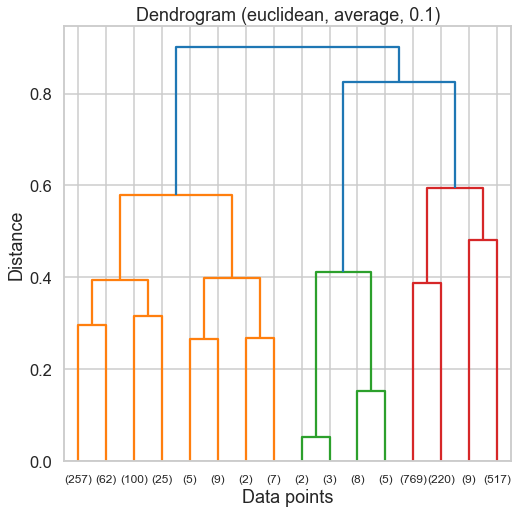

Silhouette score (euclidean, average, 0.1): 0.327
Clusters (euclidean, average, 0.1): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


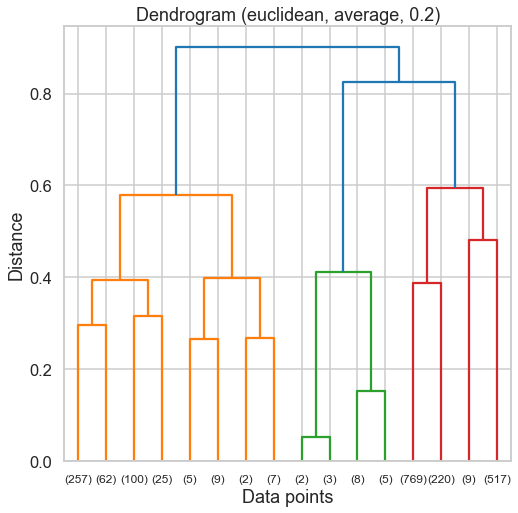

Silhouette score (euclidean, average, 0.2): 0.337
Clusters (euclidean, average, 0.2): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


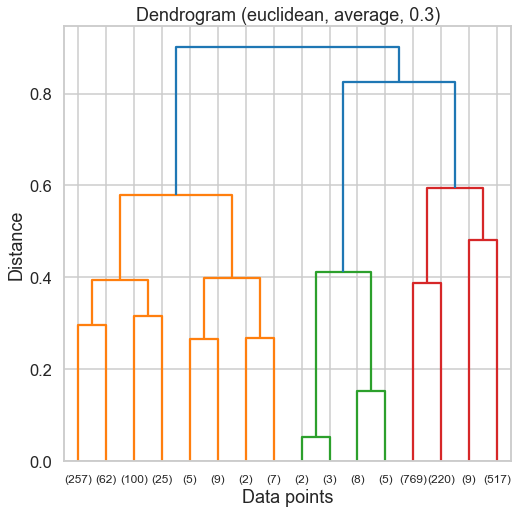

Silhouette score (euclidean, average, 0.3): 0.429
Clusters (euclidean, average, 0.3): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


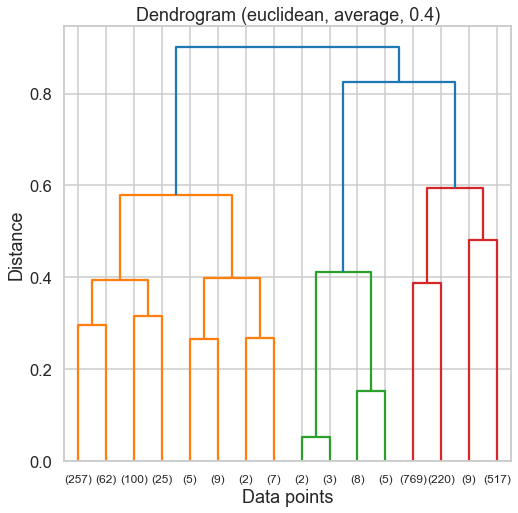

Silhouette score (euclidean, average, 0.4): 0.501
Clusters (euclidean, average, 0.4): [0 1 2 3 4 5 6 7]


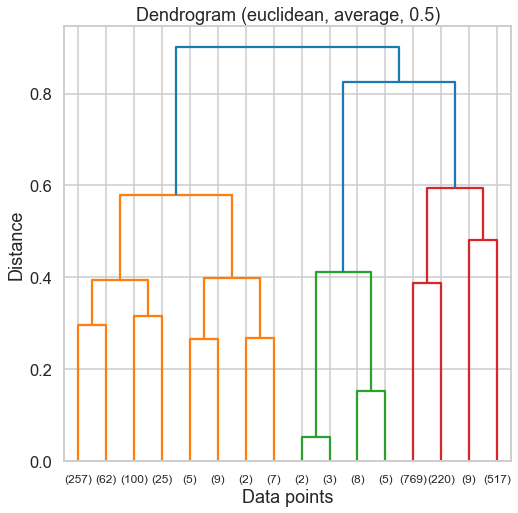

Silhouette score (euclidean, average, 0.5): 0.517
Clusters (euclidean, average, 0.5): [0 1 2 3 4]


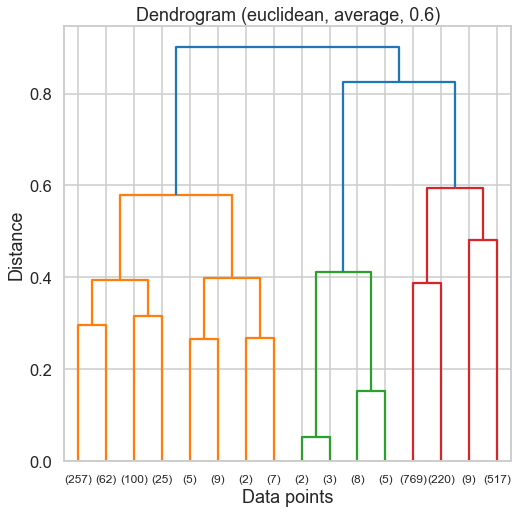

Silhouette score (euclidean, average, 0.6): 0.460
Clusters (euclidean, average, 0.6): [0 1 2]


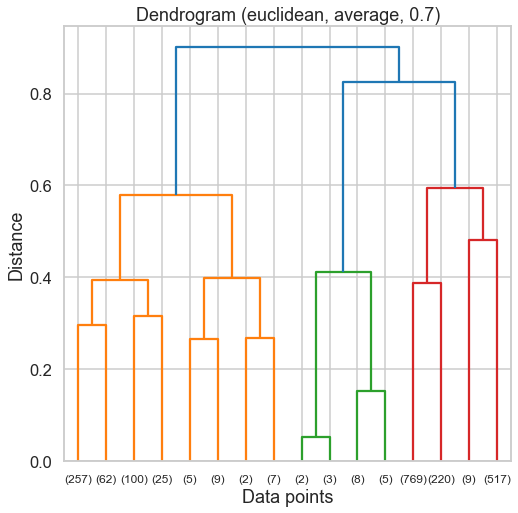

Silhouette score (euclidean, average, 0.7): 0.460
Clusters (euclidean, average, 0.7): [0 1 2]


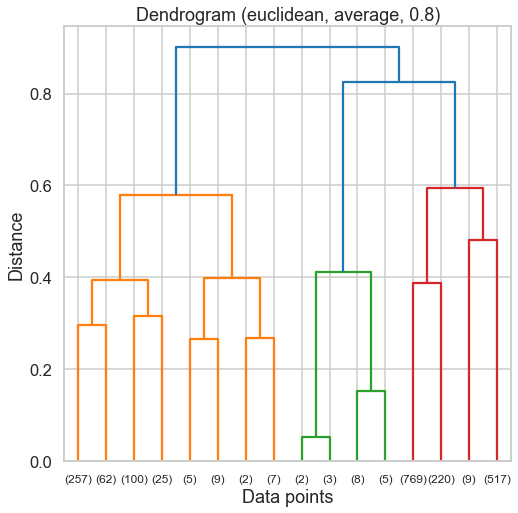

Silhouette score (euclidean, average, 0.8): 0.460
Clusters (euclidean, average, 0.8): [0 1 2]


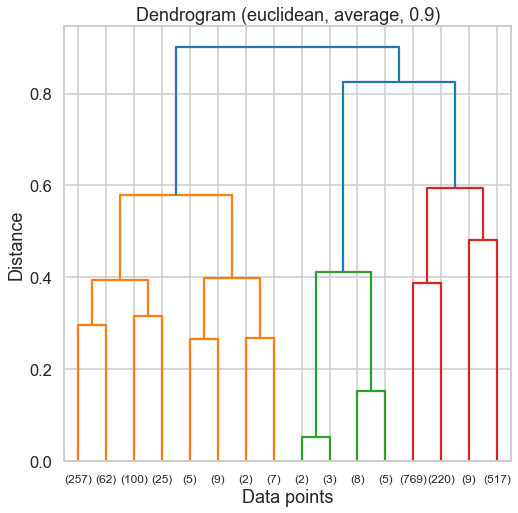

Silhouette score (euclidean, average, 0.9): 0.526
Clusters (euclidean, average, 0.9): [0 1]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [139]:
HierarchalClustering(Customer_normalized)

### DBScan

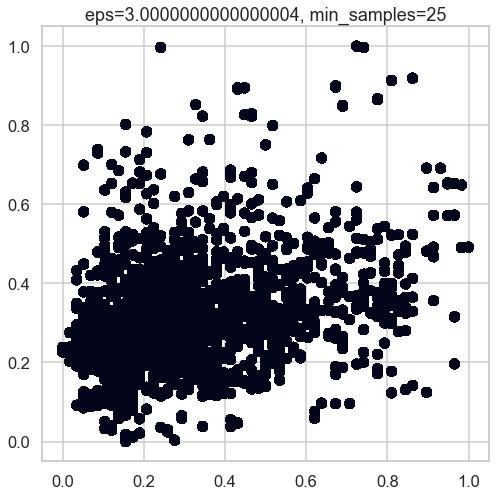

Best Silhouette Score: 0.5482978589647116
Best Parameters (eps, min_samples): (0.30000000000000004, 5)


In [140]:
DBScan(Customer_normalized)

### Gaussian Mixture

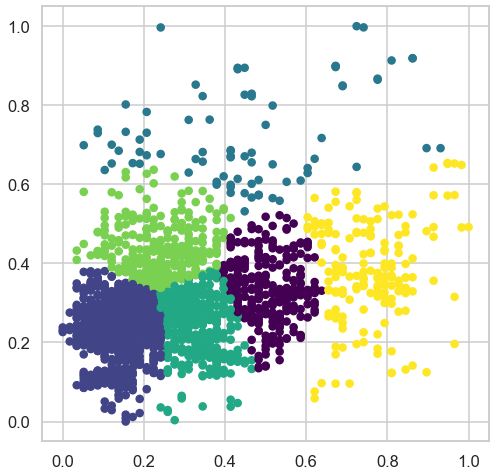

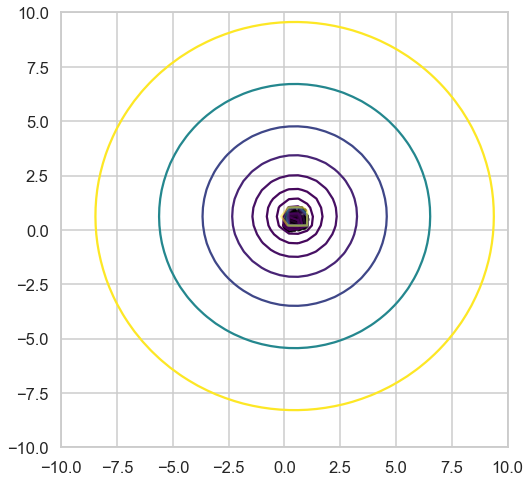

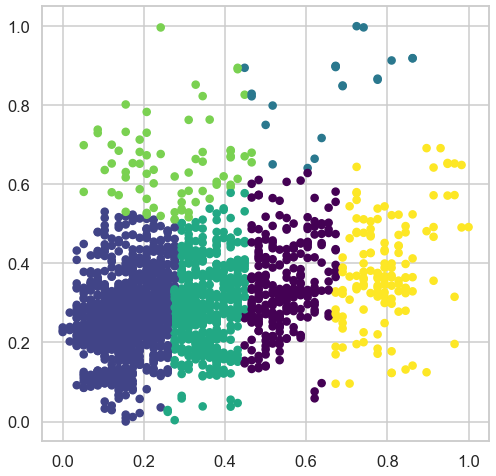

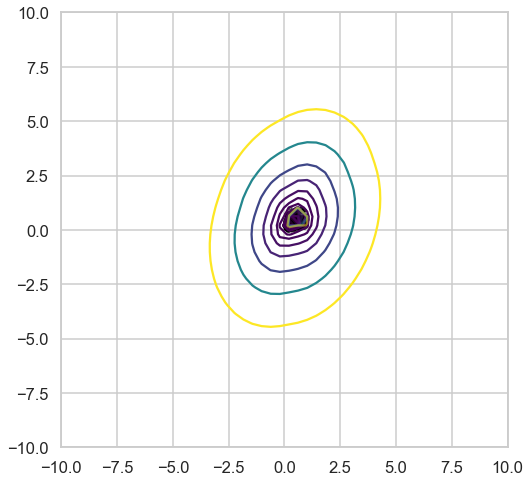

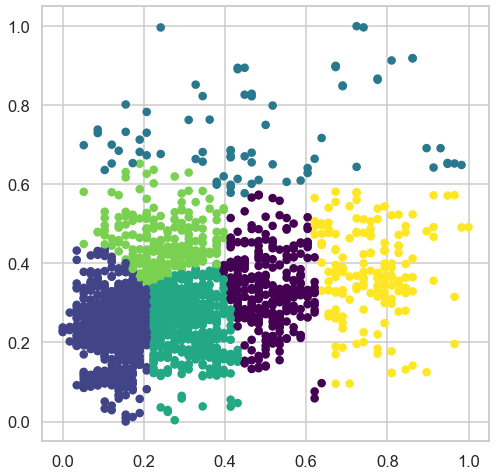

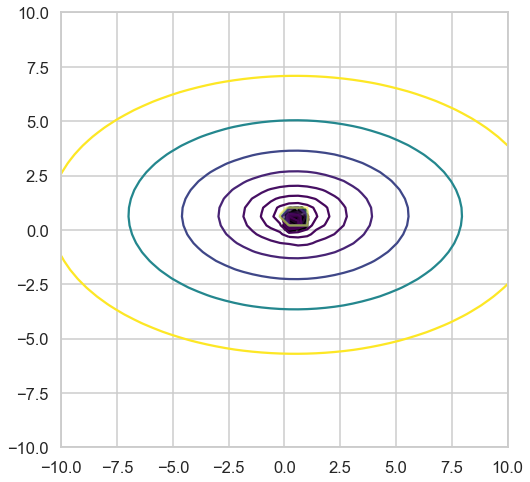

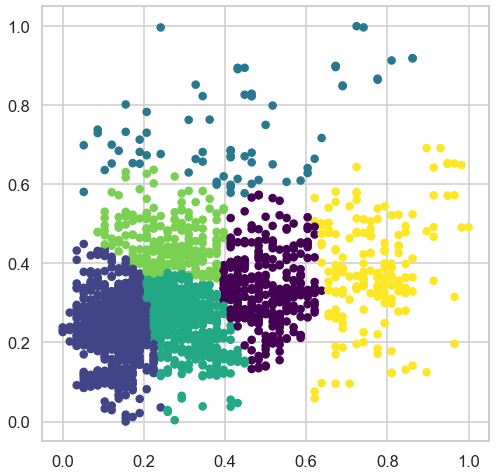

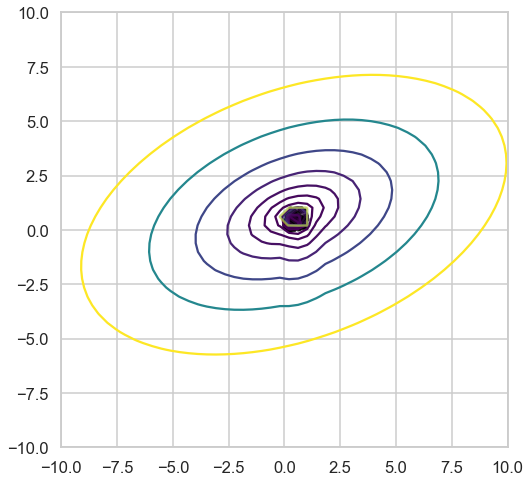

In [143]:
GaussianMix(Customer_normalized)